i=0 action={'buy': 0}
      percept={'price': 600, 'instock': 20}
i=1 action={'buy': 0}
      percept={'price': 600, 'instock': 20}
i=2 action={'buy': 0}
      percept={'price': 621, 'instock': 20}
i=3 action={'buy': 0}
      percept={'price': 621, 'instock': 20}
i=4 action={'buy': 0}
      percept={'price': 641, 'instock': 20}
i=5 action={'buy': 0}
      percept={'price': 641, 'instock': 20}
i=6 action={'buy': 0}
      percept={'price': 577, 'instock': 20}
i=7 action={'buy': 0}
      percept={'price': 577, 'instock': 20}
i=8 action={'buy': 0}
      percept={'price': 577, 'instock': 20}
i=9 action={'buy': 0}
      percept={'price': 600, 'instock': 20}
i=10 action={'buy': 0}
      percept={'price': 600, 'instock': 20}
i=11 action={'buy': 0}
      percept={'price': 600, 'instock': 20}
i=12 action={'buy': 0}
      percept={'price': 600, 'instock': 20}
i=13 action={'buy': 0}
      percept={'price': 565, 'instock': 20}
i=14 action={'buy': 0}
      percept={'price': 565, 'instock': 20}
i=15 

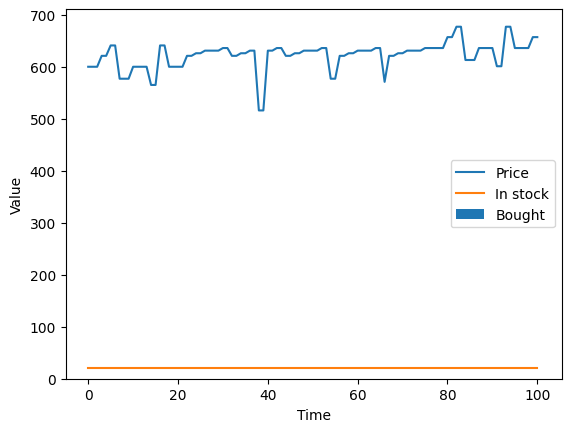

In [ ]:
# Import Required Libraries
import random
import math
import matplotlib.pyplot as plt

# Define Utility Functions
def argmaxall(gen):
    maxv = -math.inf
    maxvals = []
    for (e, v) in gen:
        if v > maxv:
            maxvals, maxv = [e], v
        elif v == maxv:
            maxvals.append(e)
    return maxvals

def argmaxe(gen):
    return random.choice(argmaxall(gen))

def argmax(lst):
    return argmaxe(enumerate(lst))

def argmaxd(dct):
    return argmaxe(dct.items())

def flip(prob):
    return random.random() < prob

def select_from_dist(item_prob_dist):
    ranreal = random.random()
    for (it, prob) in item_prob_dist.items():
        if ranreal < prob:
            return it
        else:
            ranreal -= prob
    raise RuntimeError(f"{item_prob_dist} is not a probability distribution")

# Define Display Class
class Displayable(object):
    max_display_level = 1

    def display(self, level, *args, **nargs):
        if level <= self.max_display_level:
            print(*args, **nargs)

# Define Plot History Class
class Plot_history(object):
    def __init__(self, ag, env):
        self.ag = ag
        self.env = env
        plt.ion()
        plt.xlabel("Time")
        plt.ylabel("Value")

    def plot_env_hist(self):
        num = len(self.env.stock_history)
        plt.plot(range(num), self.env.price_history, label="Price")
        plt.plot(range(num), self.env.stock_history, label="In stock")
        plt.legend()

    def plot_agent_hist(self):
        num = len(self.ag.buy_history)
        plt.bar(range(1, num + 1), self.ag.buy_history, label="Bought")
        plt.legend()

# Define Agent Controller
class Agent(Displayable):
    def initial_action(self, percept):
        return self.select_action(percept)

    def select_action(self, percept):
        raise NotImplementedError("select_action")

# Define Environment
class Environment(Displayable):
    def initial_percept(self):
        raise NotImplementedError("initial_percept")

    def do(self, action):
        raise NotImplementedError("do")

# Define Simulation
class Simulate(Displayable):
    def __init__(self, agent, environment):
        self.agent = agent
        self.env = environment
        self.percept = self.env.initial_percept()
        self.percept_history = [self.percept]
        self.action_history = []

    def go(self, n):
        for i in range(n):
            action = self.agent.select_action(self.percept)
            print(f"i={i} action={action}")
            self.percept = self.env.do(action, i)
            print(f"      percept={self.percept}")

# Define TP Environment
class TP_env(Environment):
    price_delta = [0, 0, 0, 21, 0, 20, 0, -64, 0, 0, 23, 0, 0, 0, -35,
                   0, 76, 0, -41, 0, 0, 0, 21, 0, 5, 0, 5, 0, 0, 0, 5, 0, -15, 0, 5,
                   0, 5, 0, -115, 0, 115, 0, 5, 0, -15, 0, 5, 0, 5, 0, 0, 0, 5, 0,
                   -59, 0, 44, 0, 5, 0, 5, 0, 0, 0, 5, 0, -65, 50, 0, 5, 0, 5, 0, 0,
                   0, 5, 0]

    def __init__(self, initial_price, initial_stock):
        self.price = initial_price
        self.stock = initial_stock
        self.time = 0
        self.price_history = [initial_price]
        self.stock_history = [initial_stock]

    def initial_percept(self):
        return {'price': self.price, 'instock': self.stock}

    def do(self, action, time):
        self.time += 1
        self.price += self.price_delta[self.time % len(self.price_delta)]
        self.stock += action['buy']
        self.price_history.append(self.price)
        self.stock_history.append(self.stock)
        return {'price': self.price, 'instock': self.stock}

# Define TP Agent
class TP_agent(Agent):
    def __init__(self, avg_price):
        self.avg_price = avg_price
        self.buy_history = []
        self.spent = 0

    def select_action(self, percept):
        price = percept['price']
        instock = percept['instock']
        tobuy = 0

        if price < 0.8 * self.avg_price:
            tobuy = 15
        elif instock < 10:
            tobuy = 10

        self.buy_history.append(tobuy)
        self.spent += tobuy * price
        return {'buy': tobuy}

# Run Simulation
initial_price = 600
initial_stock = 20
avg_price = 600

env = TP_env(initial_price, initial_stock)
ag = TP_agent(avg_price)
sim = Simulate(ag, env)

sim.go(100)

pl = Plot_history(ag, env)
pl.plot_env_hist()
pl.plot_agent_hist()
